In [1]:
import numpy as np
import numpy.linalg as la
import os
from ctypes import c_int, c_double, POINTER, cdll
from tqdm import tqdm

import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'grid'])
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'figure.figsize': (8, 6)})

In [2]:
a_arr = np.linspace(0, 1, 500)
eta_arr = [1, 0.999, 0.99, 0.9]

In [3]:
def get_fi_single_degree(a_arr, deg, eta):
    td_sq = (1 - 2 * np.sin(deg * np.arcsin(np.sqrt(a_arr)))**2) ** 2
    return (deg ** 2 * (eta ** (2 * deg)) * (1 - td_sq)) / (a_arr * (1 - a_arr) * (1 - (eta ** (2 * deg)) * td_sq))

$FI \sim \eta$ (MLAE)

Cost: 1120


C:\Users\hello\AppData\Local\Temp\ipykernel_14072\3833109103.py:3: RuntimeWarning: invalid value encountered in divide
  return (deg ** 2 * (eta ** (2 * deg)) * (1 - td_sq)) / (a_arr * (1 - a_arr) * (1 - (eta ** (2 * deg)) * td_sq))


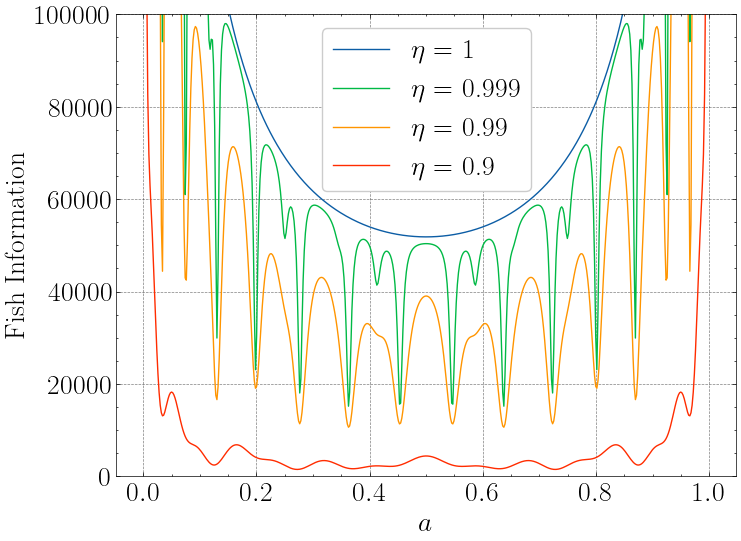

In [22]:
Ms_MLAE = [(1 << i | 1) for i in range(5)]
R_MLAE = 32
print(f"Cost: {R_MLAE * sum(Ms_MLAE)}")
fi_curves_MLAE = {}
for eta in eta_arr:
    fi_per_cost = sum([get_fi_single_degree(a_arr, deg, eta) for deg in Ms_MLAE]) * R_MLAE
    fi_curves_MLAE[f"$\\eta$ = {eta}"] = fi_per_cost
plt.figure()
for label, fi_per_cost in fi_curves_MLAE.items():
    plt.plot(a_arr, fi_per_cost, label=label)
plt.xlabel("$a$")
plt.ylabel("Fish Information")
plt.ylim(0, 100000)
plt.legend()
plt.savefig("fi_eta_mlae.pdf")
plt.show()

$FI \sim \eta$ (RQAE)

Cost: 1024.0000000000002


C:\Users\hello\AppData\Local\Temp\ipykernel_14072\3833109103.py:3: RuntimeWarning: invalid value encountered in divide
  return (deg ** 2 * (eta ** (2 * deg)) * (1 - td_sq)) / (a_arr * (1 - a_arr) * (1 - (eta ** (2 * deg)) * td_sq))


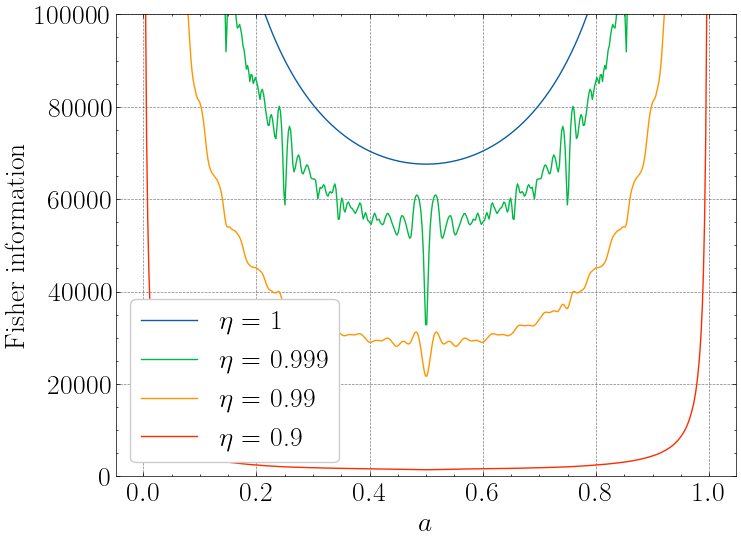

In [23]:
D_RQAE = 32
R0_RQAE = 32
# D_arr = 8 * np.arange(1, 7)
fi_curves_MLAE = {}
prob = 1 / np.arange(1, D_RQAE + 1)
R_RQAE = R0_RQAE * prob.sum()
prob /= prob.sum()
mean_cost = np.sum(prob * np.arange(1, D_RQAE + 1))
print(f"Cost: {mean_cost * R_RQAE}")
for eta in eta_arr:
    fi_per_cost = sum([prob[i] * get_fi_single_degree(a_arr, i+1, eta) for i in range(D_RQAE)]) * R_RQAE
    fi_curves_MLAE[f"$\\eta$ = {eta}"] = fi_per_cost
plt.figure()
for label, fi_per_cost in fi_curves_MLAE.items():
    plt.plot(a_arr, fi_per_cost, label=label)
plt.xlabel("$a$")
plt.ylabel("Fisher information")
plt.ylim(0, 100000)
plt.legend()
plt.savefig("fi_eta_rqae.pdf")
plt.show()

$FI \sim D$ (RQAE)

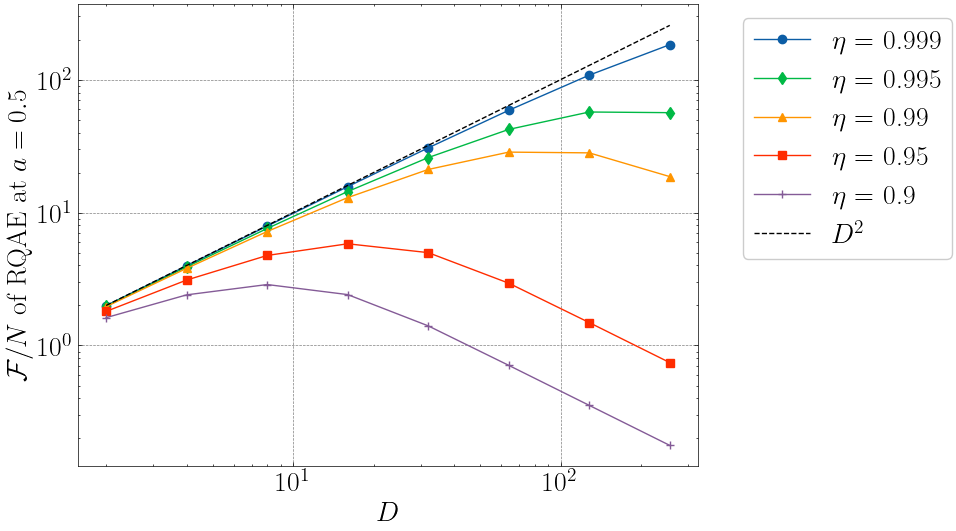

In [4]:
Ds = 1 << np.arange(1, 9)
etas = [0.999, 0.995, 0.99, 0.95, 0.9]
fi_D_RQAE = {}
for eta in etas:
    fi_per_cost = []
    for D_RQAE in Ds:
        prob = 1 / np.arange(1, D_RQAE + 1)
        prob /= prob.sum()
        cost = sum(prob * np.arange(1, D_RQAE + 1))
        fi_per_cost.append(sum([prob[i] * get_fi_single_degree(0.5, i+1, eta) for i in range(D_RQAE)]) / cost)
    fi_D_RQAE[f"$\\eta$ = {eta}"] = fi_per_cost
plt.figure()
for idx, (label, fi_per_cost) in enumerate(fi_D_RQAE.items()):
    plt.plot(Ds, fi_per_cost, label=label, marker="od^s+h"[idx])
plt.plot([2, 256], [2, 256], label="$D^2$", linestyle="--", color="black")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$D$")
plt.ylabel("$\\mathcal{F}/N$ of RQAE at $a = 0.5$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("fi_D_rqae.pdf")
plt.show()